# Plotting HDF5 TRMM 3B42 3-hourly data products
<p>by Aulia Fikri</p>

TRMM (Tropical Rainfall Measuring Mission) is a NASA-Japan Aerospace Exploration Agency (JAXA) collaboration aimed to track and investigate tropical rainfall. With a 3-hour temporal resolution and 0.25 degree spatial resolution, the 34B2 product provides a gridded, TRMM-adjusted, merged infrared precipitation (mm/hr) and RMS precipitation-error estimate.

See the [algorithm description](https://trmm.gsfc.nasa.gov/3b42.html) and the [file specification](https://storm.pps.eosdis.nasa.gov/storm/data/docs/filespec.TRMM.V7.3B42.pdf) for details.

In [1]:
# This is a test script that reads and plots the TRMM 3B42 3-hourly data.
from mpl_toolkits.basemap import Basemap, cm
import matplotlib.pyplot as plt
import numpy as np
from pyhdf.SD import SD, SDC

To begin, we'll open some TRMM 3B42 3-hourly data and provide an overview of the dataset.

Lets extract precipitation data.

In [4]:
dataset = SD('../02-raw-data/3B42.20191230.09.7.HDF', SDC.READ)
precip = dataset.select('precipitation')
precip = precip[:]
precip = np.transpose(precip)
theLats = np.arange(-49.875,50,0.25)
theLons = np.arange(-179.875,180,0.25)

With numpy change missing data

In [5]:
# Set all the missing values less than 0 to NaNs
np.putmask(precip,precip<0,np.nan)

Maps

We plot a precipitation slice to see what we can notice at map sight.

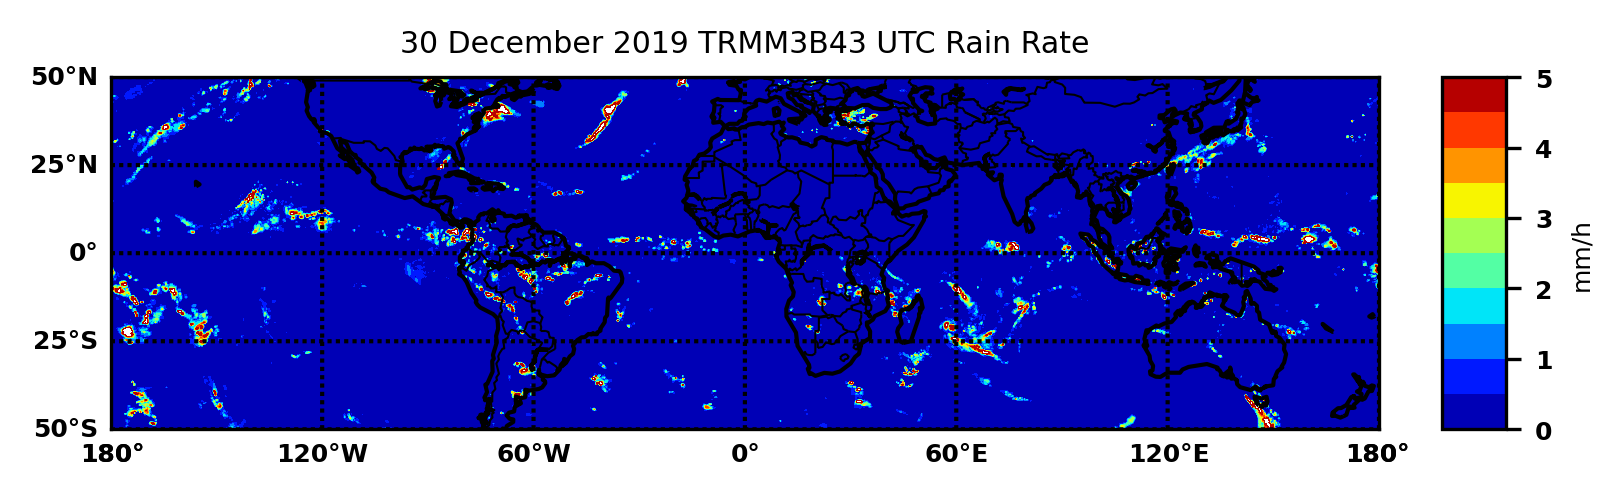

In [9]:
# Plot the figure, define the geographic bounds
fig = plt.figure(dpi=300)
latcorners = ([-50,50])
loncorners = ([-180,180])
m = Basemap(projection='cyl',\
llcrnrlat=latcorners[0],urcrnrlat=latcorners[1],llcrnrlon=loncorners[0],urcrnrlon=loncorners[1])

# Draw coastlines and country boundaries, edge of map.
m.drawcoastlines()
m.drawcountries()
# Draw filled contours.
clevs = np.arange(0,5.01,0.5)

# Define the latitude and longitude data
x, y = np.float32(np.meshgrid(theLons, theLats))
cs = m.contourf(x,y,precip,clevs,cmap=plt.cm.jet,latlon=True)
parallels = np.arange(-50.,51,25.)
m.drawparallels(parallels,labels=[True,False,True,False])
meridians = np.arange(-180.,180.,60.)
m.drawmeridians(meridians,labels=[False,False,False,True])

# Set the title and fonts
plt.title('30 December 2019 TRMM3B43 UTC Rain Rate')
font = {'family' : 'DejaVu Sans', 'weight' : 'bold', 'size' : 6}
plt.rc('font', **font)

# Add colorbar
cbar = m.colorbar(cs,location='right',pad="5%")
cbar.set_label('mm/h')
plt.savefig('../04-plot/testTRMMmap.png',dpi=300)